## Name: Krishnakanth N.
## Index No: 190323C

In [28]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

### Q1)

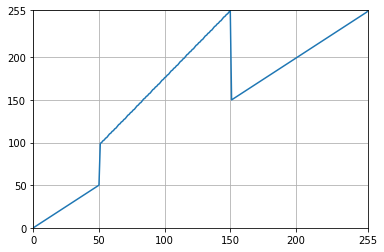

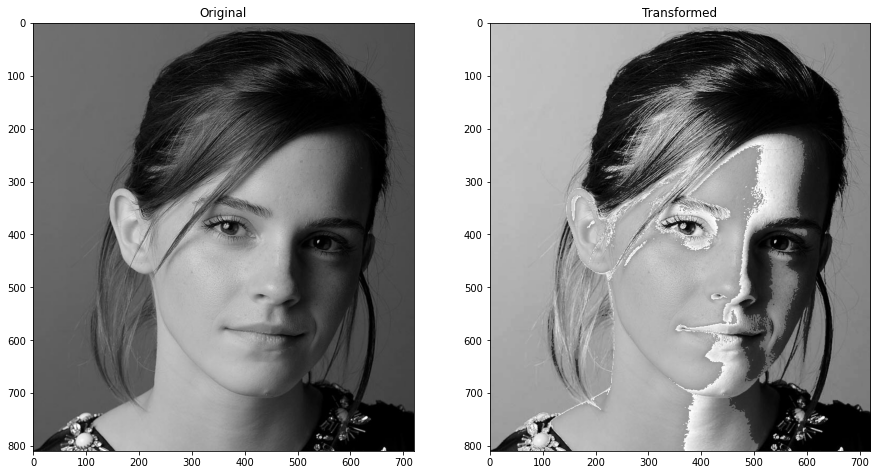

In [3]:
emma = cv.imread(r'emma_gray.jpg', cv.IMREAD_GRAYSCALE)
assert emma is not None

t1 = np.linspace(0, 50, 51)
t2 = np.linspace(99, 255, 100)
t3 = np.linspace(150, 255, 105)

t = np.concatenate((t1, t2, t3), axis=0).astype(np.uint8)

fig, ax=plt.subplots()
ax.plot(t)
ax.set_xlim(0,255)
ax.set_xticks([0,50,100,150,200,255])
ax.set_ylim(0,255)
ax.set_yticks([0,50,100,150,200,255])
plt.grid()
plt.show()

assert len(t) == 256

emma_intense = cv.LUT(emma, t)
emma_intense = cv.cvtColor(emma_intense, cv.COLOR_BGR2RGB)
emma = cv.cvtColor(emma, cv.COLOR_BGR2RGB)

fig, ax = plt.subplots(1, 2, figsize=(15, 15))
ax[0].imshow(emma)
ax[0].set_title('Original')
ax[0].axis('off')

ax[1].imshow(emma_intense)
ax[1].set_title('Transformed')
ax[1].axis('off')

plt.show()

### Q2)
### a)

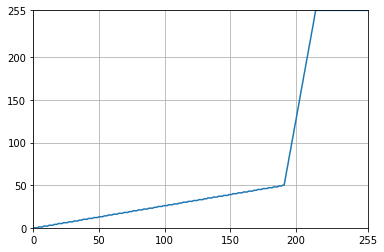

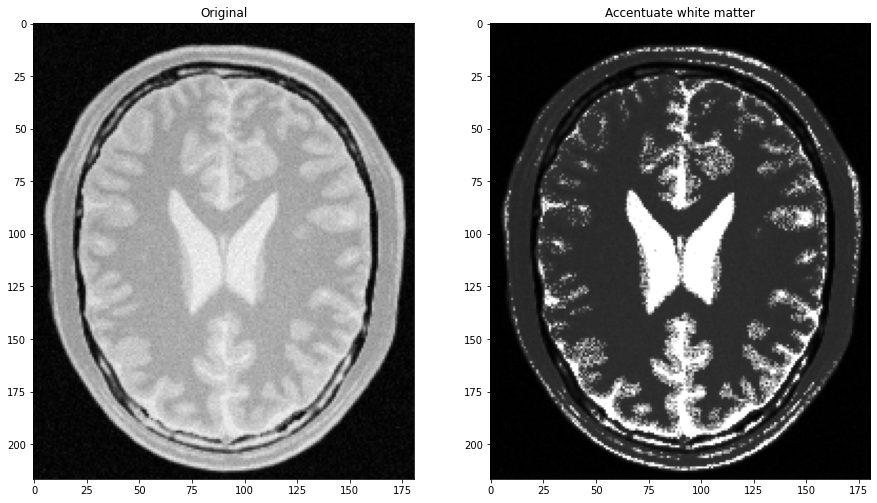

In [44]:
brain = cv.imread(r'brain_proton_density_slice.png', cv.IMREAD_GRAYSCALE)
assert brain is not None

t1 = np.linspace(0,50, 191)
t2 = np.linspace(50,255, 25)
t3 = np.linspace(255,255, 40)

t = np.concatenate((t1, t2, t3), axis=0).astype(np.uint8)

fig, ax=plt.subplots()
ax.plot(t)
ax.set_xlim(0,255)
ax.set_xticks([0,50,100,150,200,255])
ax.set_ylim(0,255)
ax.set_yticks([0,50,100,150,200,255])
plt.grid()
plt.show()

assert len(t) == 256

brian_at_white = cv.LUT(brain, t)
brian_at_white = cv.cvtColor(brian_at_white, cv.COLOR_BGR2RGB)
brain = cv.cvtColor(brain, cv.COLOR_BGR2RGB)

fig, ax = plt.subplots(1, 2, figsize=(15, 15))
ax[0].imshow(brain)
ax[0].set_title('Original')
ax[0].axis('off')

ax[1].imshow(brian_at_white)
ax[1].set_title('Accentuate white matter')
ax[1].axis('off')

plt.show()

### b)

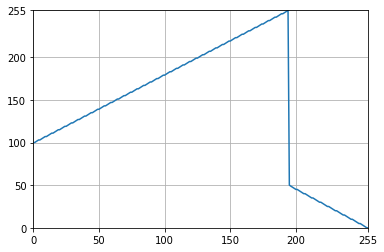

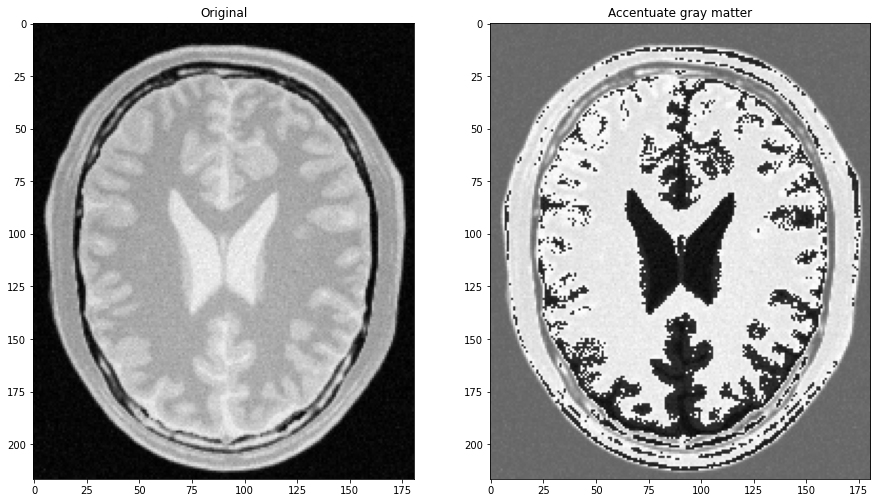

In [55]:
t1 = np.linspace(100,255, 195)
t2 = np.linspace(50,0, 61)
# t3 = np.linspace(255,255, 40)

t = np.concatenate((t1, t2), axis=0).astype(np.uint8)

fig, ax=plt.subplots()
ax.plot(t)
ax.set_xlim(0,255)
ax.set_xticks([0,50,100,150,200,255])
ax.set_ylim(0,255)
ax.set_yticks([0,50,100,150,200,255])
plt.grid()
plt.show()

assert len(t) == 256

brian_at_white = cv.LUT(brain, t)
brian_at_white = cv.cvtColor(brian_at_white, cv.COLOR_BGR2RGB)
brain = cv.cvtColor(brain, cv.COLOR_BGR2RGB)

fig, ax = plt.subplots(1, 2, figsize=(15, 15))
ax[0].imshow(brain)
ax[0].set_title('Original')
ax[0].axis('off')

ax[1].imshow(brian_at_white)
ax[1].set_title('Accentuate gray matter')
ax[1].axis('off')

plt.show()

### Q3) a)

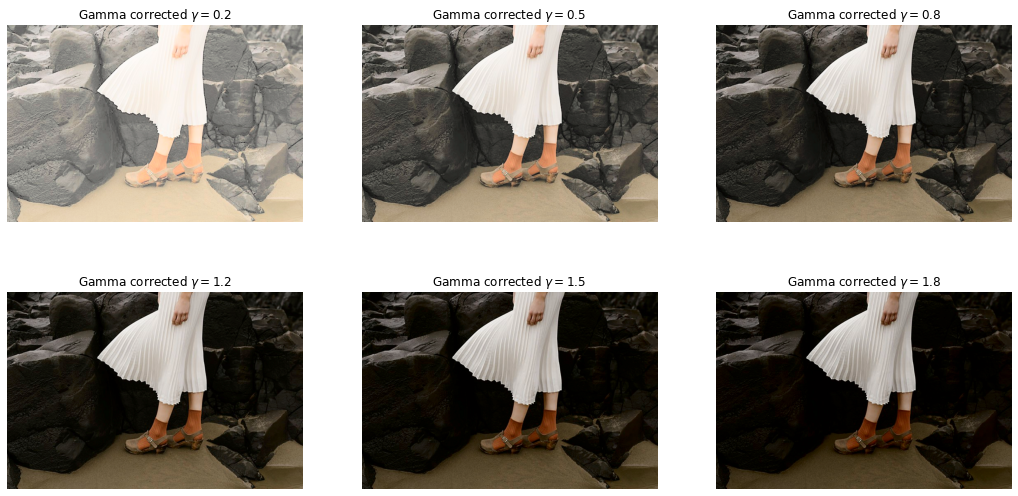

In [91]:
import copy
gamma_img = cv.imread(r'highlights_and_shadows.jpg')
gamma_img = cv.cvtColor(gamma_img, cv.COLOR_BGR2LAB)

gamma_list = [ 0.2, 0.5, 0.8, 1.2, 1.5, 1.8]
j=0
fig, ax = plt.subplots(2, 3, figsize=(18, 9))

for gamma in gamma_list:    
    r=j//3
    c=j%3

    img_copy = copy.deepcopy(gamma_img)

    t = np.array([(p/255)**gamma*255 for p in range (0, 256)]).astype(np.uint8)
    img_copy[:,:,0] = cv.LUT(img_copy[:,:,0], t)
    img_copy = cv.cvtColor(img_copy, cv.COLOR_LAB2RGB)
    
    ax[r][c].imshow(img_copy)
    ax[r][c].set_title('Gamma corrected $\gamma = {}$'.format(gamma))
    ax[r][c].axis('off')

    j+=1
plt.show()


### b)

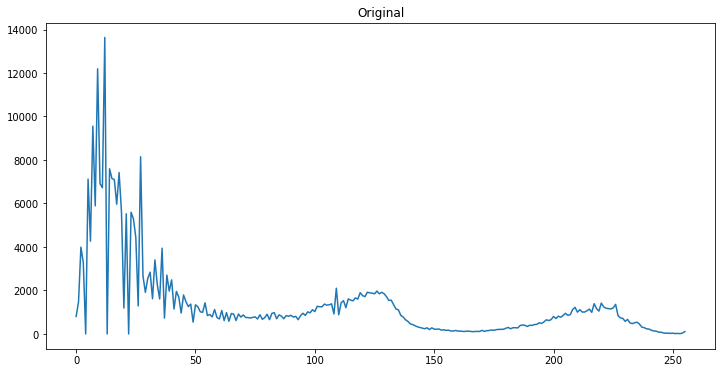

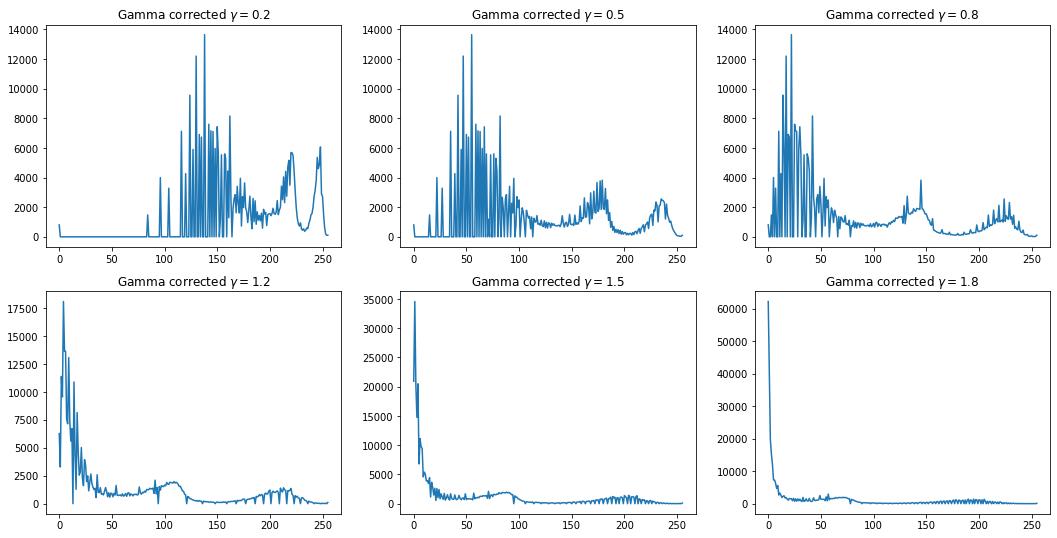

In [106]:
hist_original = cv.calcHist([gamma_img], [0], None, [256], [0,256])

fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(hist_original)
ax.set_title(r'Original')
plt.show()

fig, ax = plt.subplots(2, 3, figsize=(18, 9))
j=0
for gamma in gamma_list:    
    r=j//3
    c=j%3

    img_copy = copy.deepcopy(gamma_img)

    t = np.array([(p/255)**gamma*255 for p in range (0, 256)]).astype(np.uint8)
    img_copy[:,:,0] = cv.LUT(img_copy[:,:,0], t)
    hist_after = cv.calcHist([img_copy], [0], None, [256], [0,256])
    
    ax[r][c].plot(hist_after)
    ax[r][c].set_title('Gamma corrected $\gamma = {}$'.format(gamma))

    j+=1
plt.show()

### Q4)

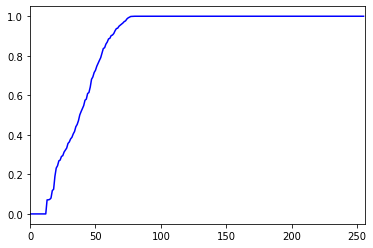

In [124]:
hist_img = cv.imread(r'shells.png', cv.IMREAD_GRAYSCALE).astype(np.uint8)
hist , bins = np.histogram(hist_img.ravel(), 256, [0, 256])
cdf = hist.cumsum()
cdf_normalized = cdf*255/cdf.max()

plt.plot(cdf_normalized, color = 'b')
plt.xlim([0, 256])
plt.show()

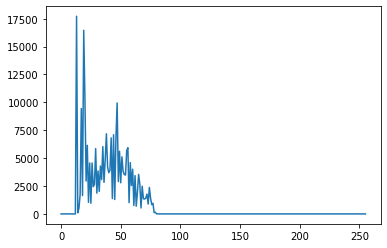

In [116]:
plt.plot(hist)

In [126]:
np.size(hist_img)
cdf*255/cdf.max()

array([  0.     ,   0.     ,   0.     ,   0.     ,   0.     ,   0.     ,
         0.     ,   0.     ,   0.     ,   0.     ,   0.     ,   0.     ,
         0.     ,  18.07236,  18.17028,  18.6864 ,  20.4714 ,  30.10122,
        31.77606,  48.5622 ,  59.15082,  62.15472,  68.4267 ,  69.48546,
        74.14278,  75.123  ,  79.77624,  82.27116,  84.96498,  90.94218,
        92.8404 ,  96.7674 ,  98.82372, 103.19952, 106.34214, 112.49376,
       115.38036, 120.34572, 127.67442, 131.95536, 135.72528, 139.7145 ,
       146.66478, 148.07136, 155.30724, 156.62814, 163.57638, 173.71926,
       176.67522, 182.40252, 185.24934, 190.4697 , 194.36508, 197.96874,
       201.52038, 207.31296, 213.36462, 214.39278, 219.08376, 221.68068,
       225.76782, 226.53486, 230.03652, 230.74032, 232.7181 , 236.33298,
       239.05434, 239.598  , 242.12964, 243.51582, 244.87854, 246.3147 ,
       248.12826, 249.02994, 251.4504 , 252.89778, 253.74438, 254.71236,
       254.83068, 254.98368, 254.98878, 254.99898, 